In [1]:
import numpy as np
import pandas as pd

print "pandas v%s\nnumpy v%s" % (pd.__version__, np.__version__)

pandas v0.17.1
numpy v1.10.1


In [2]:
Smarket = pd.read_csv('../data_sets/Smarket.csv')
Smarket.drop('Unnamed: 0', axis=1, inplace=True)
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [4]:
Smarket.groupby('Direction').count()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Direction,,,,,,,,
Down,602,602,602,602,602,602,602,602
Up,648,648,648,648,648,648,648,648


In [5]:
import matplotlib.pyplot as plt

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

import seaborn as sns

print "matplotlib v%s\nseaborn v%s" % (matplotlib.__version__, sns.__version__)

matplotlib v1.5.0
seaborn v0.6.0


C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


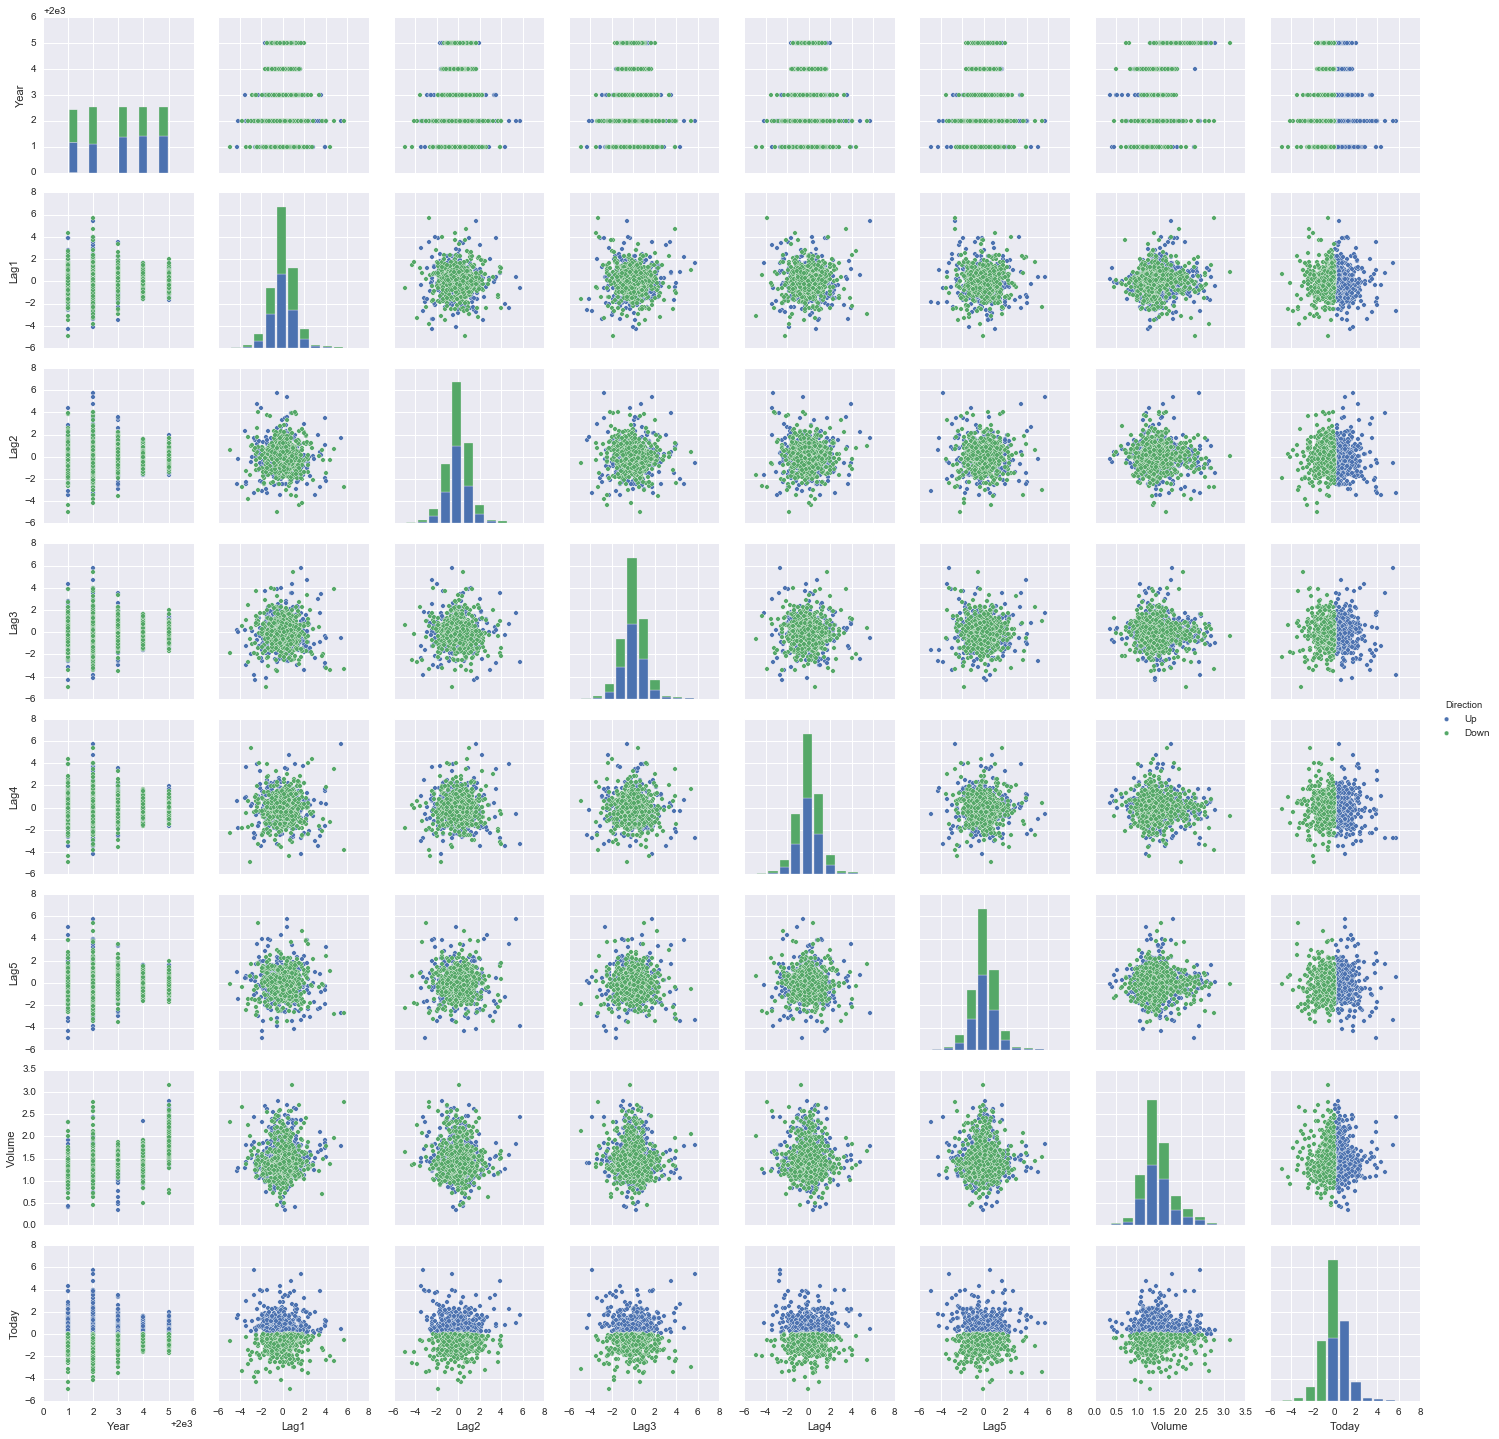

In [6]:
sns.pairplot(Smarket, hue="Direction")

# Logistic Regression - sklearn

Source: https://www.youtube.com/user/dataschool/videos

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
# define X and y
# features = []
X = Smarket.ix[:,'Lag1':'Volume']
y = Smarket.Direction

In [9]:
X[:5]

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.381,-0.192,-2.624,-1.055,5.010,1.1913
1,0.959,0.381,-0.192,-2.624,-1.055,1.2965
2,1.032,0.959,0.381,-0.192,-2.624,1.4112
3,-0.623,1.032,0.959,0.381,-0.192,1.2760
4,0.614,-0.623,1.032,0.959,0.381,1.2057


In [10]:
y[:5]

0      Up
1      Up
2    Down
3      Up
4      Up
Name: Direction, dtype: object

In [11]:
logit = LogisticRegression()
logit.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [12]:
print np.array(y[:5])
print logit.predict(X[:5])

['Up' 'Up' 'Down' 'Up' 'Up']
['Up' 'Down' 'Down' 'Up' 'Up']


In [13]:
logit.predict_proba(X[:5])

array([[ 0.49224404,  0.50775596],
       [ 0.51791235,  0.48208765],
       [ 0.51852092,  0.48147908],
       [ 0.48438969,  0.51561031],
       [ 0.48865013,  0.51134987]])

In [14]:
print metrics.confusion_matrix(y, logit.predict(X))

[[143 459]
 [135 513]]


| n=1250   | Predicted: 0 (Down) | Predicted: 1 (Up) |
|----------|:-------------:|:------:|
| **Actual: 0 (Down)** |  143 | 459 |
| **Actual: 1 (Up)** |  135   |  513  |


In [15]:
confusion = metrics.confusion_matrix(y, logit.predict(X))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Computed confusion matrix metrics

In [16]:
y_pred = logit.predict(X)
print y[:5]
print y_pred

0      Up
1      Up
2    Down
3      Up
4      Up
Name: Direction, dtype: object
['Up' 'Down' 'Down' ..., 'Up' 'Up' 'Up']


In [17]:
# create binary 0/1 versions to avoid later errors
y_01 = ('Up' == y).astype(int)
y_pred_01 = ('Up' == y_pred).astype(int)

**Classification Accuracy**: overall, how often is the classifier correct?

**in R**: mean(glm.pred==Direction)

In [18]:
# ACC = (TP + TN) / (P + N)
print (TP + TN) / float(TP + TN + FP + FN)
print metrics.accuracy_score(y, y_pred)

0.5248
0.5248


**Classification Error**: overall, how often is the classifier incorrect?
- also known as "Misclassification Rate"

In [19]:
print (FP + FN) / float(TP + TN + FP + FN)
print 1 - metrics.accuracy_score(y, y_pred)

0.4752
0.4752


**Sensitivity**: "True Positive Rate" or "Recall"

In [20]:
# TPR = TP / P
# TPR = TP / (TP + FN)
print TP / float(TP + FN)
print metrics.recall_score(y_01, y_pred_01)    # require binary 0/1 to avoid error

0.791666666667
0.791666666667


**Specificity**: how "specific" or "selective" in predicting positive instances

In [21]:
# SPC or TNR
# TNR = TN / N
# TNR = TN / (TN + FP)
print TN / float(TN + FP)

0.237541528239


**False Positive Rate**: when the actual value is negative, how often is the prediction incorrect?

In [22]:
# FPR = FP / N
# FPR = FP / (FP + TN)
# FPR = 1 - SPC
print FP / float(FP + TN)

# SPC or TNR
SPC = TN / float(TN + FP)
print 1 - SPC

0.762458471761
0.762458471761


**Precision**: when a positive value is predicted, how often is the prediction correct?

In [23]:
# precision or Positive Prediction Value (PPV)
print TP / float(TP + FP)
print metrics.precision_score(y_01, y_pred_01)    # require binary 0/1 to avoid error

0.527777777778
0.527777777778


<img src="plots/confM_term.PNG">

Source: https://en.wikipedia.org/wiki/Precision_and_recall

## train/test split

### Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume

In [24]:
features = Smarket.columns[1:7]    # columns Lag1:Volume

X_train = Smarket[Smarket.Year < 2005][features]; print X_train.shape
X_test = Smarket[Smarket.Year == 2005][features]; print X_test.shape

y_train = Smarket[Smarket.Year < 2005]['Direction']; print y_train.shape
y_test = Smarket[Smarket.Year == 2005]['Direction']; print y_test.shape

(998, 6)
(252, 6)
(998L,)
(252L,)


In [25]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [26]:
y_pred = logit.predict(X_test)

In [27]:
print metrics.confusion_matrix(y_test, y_pred)

[[71 40]
 [89 52]]


| n=252   | Predicted: 0 (Down) | Predicted: 1 (Up) |
|----------|:-------------:|:------:|
| **Actual: 0 (Down)** |  71 | 40 |
| **Actual: 1 (Up)** |  89   |  52  |

In [28]:
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred)

0.488095238095


In [29]:
logit.predict_proba(X_test)[:10]

array([[ 0.47459022,  0.52540978],
       [ 0.48380199,  0.51619801],
       [ 0.47594313,  0.52405687],
       [ 0.4847563 ,  0.5152437 ],
       [ 0.50108009,  0.49891991],
       [ 0.49867607,  0.50132393],
       [ 0.49689822,  0.50310178],
       [ 0.48998874,  0.51001126],
       [ 0.49528928,  0.50471072],
       [ 0.4888286 ,  0.5111714 ]])

**Null accuracy**: accuracy that could be achieved by always predicting the most frequent class

In [30]:
# examine class distribution
print y_test.value_counts()
y_test_01 = ('Up' == y_test).astype(int)    # create binary 0/1 versions to avoid later errors
print y_test_01.value_counts()

Up      141
Down    111
Name: Direction, dtype: int64
1    141
0    111
Name: Direction, dtype: int64


In [31]:
# calculate percentage of ones
y_test_01.mean()

0.5595238095238095

In [32]:
# calculate percentage of zeros
1 - y_test_01.mean()

0.44047619047619047

In [33]:
# calculate null accuracy; ONLY for binary classified as 0/1
max(y_test_01.mean(), 1-y_test_01.mean())

0.5595238095238095

In [34]:
# calculate null accuracy for multi-class classification
y_test_01.value_counts().head(1) / len(y_test_01)

1    0.559524
Name: Direction, dtype: float64

### Direction~Lag1+Lag2

In [35]:
features = ['Lag1', 'Lag2']

X_train = Smarket[Smarket.Year < 2005][features]; print X_train.shape
X_test = Smarket[Smarket.Year == 2005][features]; print X_test.shape

y_train = Smarket[Smarket.Year < 2005]['Direction']; print y_train.shape
y_test = Smarket[Smarket.Year == 2005]['Direction']; print y_test.shape

(998, 2)
(252, 2)
(998L,)
(252L,)


In [36]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [37]:
y_pred = logit.predict(X_test)

In [38]:
print metrics.confusion_matrix(y_test, y_pred)
print ''
print metrics.accuracy_score(y_test, y_pred)

[[ 35  76]
 [ 35 106]]

0.559523809524


| n=252   | Predicted: 0 (Down) | Predicted: 1 (Up) |
|----------|:-------------:|:------:|
| **Actual: 0 (Down)** |  35 | 76 |
| **Actual: 1 (Up)** |  35   |  106  |

In [39]:
logit.predict_proba(X_test)[:10, :]

array([[ 0.49020973,  0.50979027],
       [ 0.47924338,  0.52075662],
       [ 0.46683748,  0.53316252],
       [ 0.47402416,  0.52597584],
       [ 0.49281985,  0.50718015],
       [ 0.49388824,  0.50611176],
       [ 0.49513475,  0.50486525],
       [ 0.48731477,  0.51268523],
       [ 0.49073267,  0.50926733],
       [ 0.48442973,  0.51557027]])

In [40]:
logit.predict_proba(X_test)[:10, 1]

array([ 0.50979027,  0.52075662,  0.53316252,  0.52597584,  0.50718015,
        0.50611176,  0.50486525,  0.51268523,  0.50926733,  0.51557027])

In [41]:
y_pred_prob = logit.predict_proba(X_test)[:, 1]

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

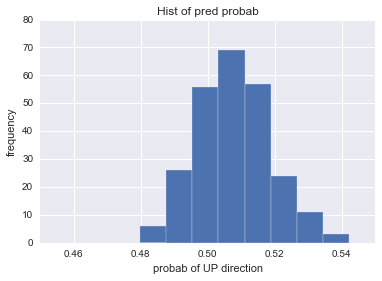

In [43]:
# hist of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(.45, .55)
plt.ylim(0, 80)
plt.title('Hist of pred probab')
plt.xlabel('probab of UP direction')
plt.ylabel('frequency')

# ROC Curves and Area Under Curve (AUC)

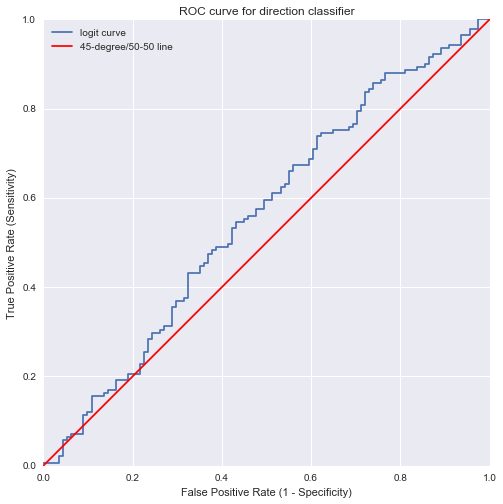

In [44]:
# IMPORTANT: 1st arg is true values, 2nd arg is predicted probabilities

y_test_01 = ('Up' == y_test).astype(int)    # create binary 0/1 versions to avoid later errors
fpr, tpr, thresholds = metrics.roc_curve(y_test_01, y_pred_prob)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='logit curve')
plt.plot([0, 1], [0, 1], 'r-', label='45-degree/50-50 line')    # plot 45-degree/50-50 line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for direction classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc=0)
plt.grid(True)

In [45]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print 'Sensitivity:', tpr[thresholds > threshold][-1]
    print 'Specificity:', 1 - fpr[thresholds > threshold][-1] 

In [46]:
evaluate_threshold(0.5)

Sensitivity: 0.751773049645
Specificity: 0.315315315315


In [47]:
evaluate_threshold(0.3)

Sensitivity: 1.0
Specificity: 0.0


# Logistic Regression - statsmodels

### Generalized Linear Models (Formula)
Source: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html

In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [49]:
formula1 = "Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume"
mod1 = smf.glm(formula=formula1, data=Smarket, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Tue, 01 Mar 2016   Deviance:                       1727.6
Time:                                          14:32:09   Pearson chi2:                 1.25e+03
No. Iterations:                                       6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601        -0.346     0.598
Lag1           0.0731      0.050      1.457      0.145        -0.025     0.171
Lag2           0.0423      0.050      0.845      0.398        -0.056     0.140
Lag3          -0.0111      0.050     -0.222      0.824        -0.109     0.087
Lag4          -0.0094      0.050     -0.187      0.851        -0.107     0.089
Lag5          -0.0103      0.050     -0.208      0.835        -0.107     0.087
Volume        -0.1354      0.158     -0.855      0.392        -0.446     0.175
==============================================================================
"""

### sm.Logit
Source: http://blog.yhat.com/posts/logistic-regression-and-python.html

In [50]:
# manually add the intercept
Smarket['intercept'] = 1.
cols = Smarket.columns.tolist(); cols
cols = [cols[0]] + cols[-1:] + cols[1:-1]; print cols

train_cols = cols[1:8]; print train_cols

['Year', 'intercept', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']
['intercept', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']


In [51]:
direction_01 = ('Up' == Smarket.Direction).astype(int)
direction_01[:5]

0    1
1    1
2    0
3    1
4    1
Name: Direction, dtype: int32

In [52]:
logit = sm.Logit(direction_01, Smarket[train_cols])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 01 Mar 2016   Pseudo R-squ.:                0.002074
Time:                        14:32:09   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept     -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.

### fit & predict

In [53]:
# manually add the intercept
Smarket['intercept'] = 1.
cols = Smarket.columns.tolist(); cols
cols = [cols[0]] + cols[-1:] + cols[1:-1]; print cols

train_cols = cols[1:4]; print train_cols

['Year', 'intercept', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']
['intercept', 'Lag1', 'Lag2']


In [54]:
X_train = Smarket[Smarket.Year < 2005][train_cols]; print X_train.shape
X_test = Smarket[Smarket.Year == 2005][train_cols]; print X_test.shape

# will binarize directly to int
y_train = ('Up' == Smarket[Smarket.Year < 2005].Direction).astype(int); print y_train.shape
y_test = ('Up' == Smarket[Smarket.Year == 2005].Direction).astype(int); print y_test.shape

(998, 3)
(252, 3)
(998L,)
(252L,)


In [55]:
logit = sm.Logit(y_train, X_train)
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            2
Date:                Tue, 01 Mar 2016   Pseudo R-squ.:                0.001347
Time:                        14:32:09   Log-Likelihood:                -690.70
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.3939
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept      0.0322      0.063      0.508      0.611        -0.092     0.156
Lag1          -0.0556      0.

In [56]:
y_predprob = result.predict(X_test)
y_pred = (y_predprob > .5).astype(int)
print y_pred[:5]
print y_test[:5]

[1 1 1 1 1]
998     0
999     0
1000    0
1001    1
1002    0
Name: Direction, dtype: int32


In [57]:
# accuracy
np.mean((y_pred == y_test).astype(int))

0.5595238095238095

# Linear Discriminant Analysis

Source: http://sebastianraschka.com/Articles/2014_python_lda.html

In [58]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,intercept
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
X = Smarket.loc[:,'Lag1':'Volume'].values
y = Smarket.Direction.values

In [61]:
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y)

In [62]:
label_dict = {1: 'Up', 0: 'Down'}

In [63]:
feature_dict = {i:label for i,label in zip(
                range(7),
                  Smarket.columns[1:7])}
feature_dict

{0: 'Lag1', 1: 'Lag2', 2: 'Lag3', 3: 'Lag4', 4: 'Lag5', 5: 'Volume'}

In [64]:
import math

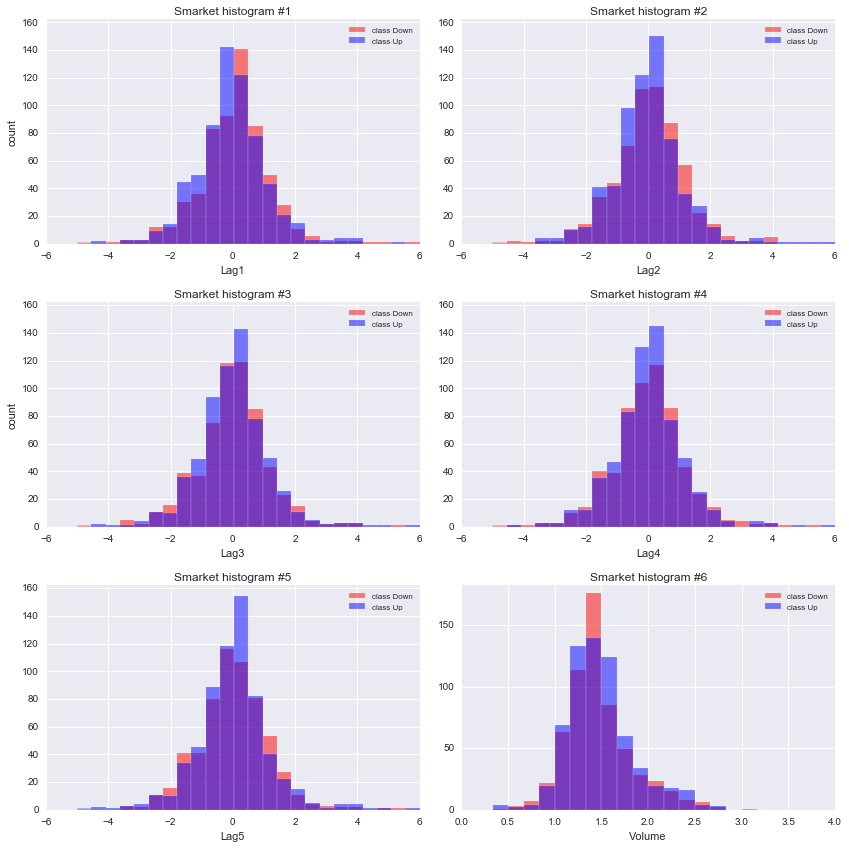

In [65]:
###
### Source: http://sebastianraschka.com/Articles/2014_python_lda.html
###

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

for ax,cnt in zip(axes.ravel(), range(8)):
    
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)
    
    # plotting the histograms
    for lab,col in zip(range(2), ('red', 'blue')):
        ax.hist(X[y==lab, cnt],
                color=col,
                label='class %s' % label_dict[lab],
                bins=bins,
                alpha=0.5,)
    ylims = ax.get_ylim()
    
    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Smarket histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

### fit
Source: http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [66]:
from sklearn.lda import LDA

In [67]:
X = Smarket[Smarket.Year<2005][['Lag1', 'Lag2']].values
y = ('Up' == Smarket[Smarket.Year<2005].Direction.values).astype(int)

In [68]:
clf = LDA()

In [69]:
clf.fit(X,y)

LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)

In [70]:
clf.priors_

array([ 0.49198397,  0.50801603])

In [71]:
clf.coef_

array([[-0.05544078, -0.0443452 ]])

In [72]:
clf.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

### predict

In [73]:
y_pred = clf.predict(Smarket[Smarket.Year==2005][['Lag1', 'Lag2']].values)

y_test = Smarket[Smarket.Year==2005].Direction.values
y_test = label_encoder.transform(y_test)

print y_pred[:25]
print y_test[:25]

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0]
[0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0]


In [74]:
print metrics.confusion_matrix(y_test, y_pred)
print ''
print metrics.accuracy_score(y_test, y_pred)

[[ 35  76]
 [ 35 106]]

0.559523809524


# KNN
Source: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Source: https://www.youtube.com/user/dataschool/videos

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
X_train = Smarket[Smarket.Year<2005][['Lag1', 'Lag2']].values
X_test = Smarket[Smarket.Year==2005][['Lag1', 'Lag2']].values

y_train = label_encoder.transform(Smarket[Smarket.Year<2005].Direction.values)
y_test = label_encoder.transform(Smarket[Smarket.Year==2005].Direction.values)

In [77]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [78]:
y_pred = knn.predict(X_test)

In [79]:
print metrics.confusion_matrix(y_test, y_pred)
print ''
print metrics.accuracy_score(y_test, y_pred)

[[43 68]
 [58 83]]

0.5


In [80]:
# search for various K for KNN
k_range = range(1, 31)
y_preds = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    y_preds.append(metrics.accuracy_score(y_test, y_pred))
print y_preds

[0.5, 0.48412698412698413, 0.53174603174603174, 0.51587301587301593, 0.48412698412698413, 0.49603174603174605, 0.4642857142857143, 0.48412698412698413, 0.49603174603174605, 0.51984126984126988, 0.53174603174603174, 0.51587301587301593, 0.50396825396825395, 0.45634920634920634, 0.48412698412698413, 0.44841269841269843, 0.49206349206349204, 0.46825396825396826, 0.51190476190476186, 0.48015873015873017, 0.50396825396825395, 0.51190476190476186, 0.49206349206349204, 0.49603174603174605, 0.48809523809523808, 0.48809523809523808, 0.49206349206349204, 0.47222222222222221, 0.50396825396825395, 0.50396825396825395]


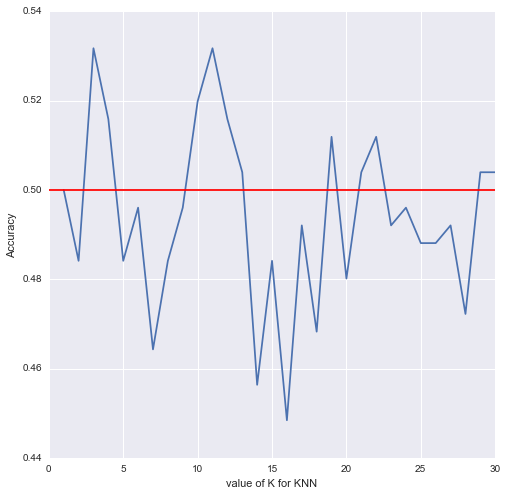

In [81]:
# plot value of K for KNN vs accuracy
plt.figure(figsize=(8,8))
plt.plot(k_range, y_preds)
plt.plot([0, 30], [.5, .5], 'r-')
plt.xlabel('value of K for KNN')
plt.ylabel('Accuracy')